# Sentiment Analysis using NLP (Spacy/ntlk)
### Check out Spacy's API! It's very extensive.
https://spacy.io/api/doc

In [2]:
# Before you begin, make sure to install spacy and download 1 of the language models that have a host of relationships already
# built in! Each model comes with prebuilt tokenization icons, Tags, dependencies, sentence segmentation, and entities!

# pip install spacy

# Download the large word vector models from spacy
# Other Language models to be downloaded here: https://spacy.io/usage/models

# python -m spacy download en_core_web_sm
# python -m spacy download en_core_web_md
# python -m spacy download en_core_web_lg

### If you're not familiar with Basic Machine Learning Concepts and Logistic Regression, check out these videos to get caught up! (Links are in the description)
![Logistic_Regression](logisticRegression.PNG)

In [1]:
# DataFrame
import pandas as pd

# Matplot
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

import spacy

# nltk
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer

# Word2vec
import gensim

# Utility
import re
import numpy as np
from collections import Counter
import time

c:\users\spenc\anaconda3\envs\nlp\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


# Preprocessing text data includes the following steps:
- Tokeniziation (Break down document into words, sentences, or other categories)
- Removal of unnecessary text that don't add a lot of value to our machine learning model.
- Normalization (simplifying word to its root form -- you can think of this as getting the infinitive of a verb)

# Let's start with Tokenization

In [4]:
text = """
Hi! My name is Spencer and I love doing videos related to tech implementation/strategy. If you like finance, tech, or real world
Q&A videos about Data Science, Data Engineering, and Data Analyst related topics, let me know in the comments down below! *psst*
If you made it this far in the video, why don't you subscribe? I upload videos every week on a Sunday ~7:00 PM EST. If you like
this type of content make sure to hit that like button! That really helps out with the growth of this channel. :)
"""

In [5]:
# In the NLP pipeline world, you would typically preprocess your data before you start feeding it to your NLP model.
# For instance, let's begin by removing special characters.
# In the real world, you would have many data streams coming in in different formats. And, you would run your various regex
# functions to identify known patterns of text and store them in JSONL or other data storage files.
pattern = r'[^A-Za-z ]'
regex = re.compile(pattern)
result = regex.sub('', text)
result

'Hi My name is Spencer and I love doing videos related to tech implementationstrategy If you like finance tech or real worldQA videos about Data Science Data Engineering and Data Analyst related topics let me know in the comments down below psstIf you made it this far in the video why dont you subscribe I upload videos every week on a Sunday  PM EST If you likethis type of content make sure to hit that like button That really helps out with the growth of this channel '

In [6]:
# Load in the NLP model that you have chosen to downloaded; I have the large model.
nlp = spacy.load("en_core_web_lg")
doc = nlp(result)

In [7]:
# Let's get each individual word as an element.
tokens = [token for token in doc]
tokens

[Hi,
 My,
 name,
 is,
 Spencer,
 and,
 I,
 love,
 doing,
 videos,
 related,
 to,
 tech,
 implementationstrategy,
 If,
 you,
 like,
 finance,
 tech,
 or,
 real,
 worldQA,
 videos,
 about,
 Data,
 Science,
 Data,
 Engineering,
 and,
 Data,
 Analyst,
 related,
 topics,
 let,
 me,
 know,
 in,
 the,
 comments,
 down,
 below,
 psstIf,
 you,
 made,
 it,
 this,
 far,
 in,
 the,
 video,
 why,
 do,
 nt,
 you,
 subscribe,
 I,
 upload,
 videos,
 every,
 week,
 on,
 a,
 Sunday,
  ,
 PM,
 EST,
 If,
 you,
 likethis,
 type,
 of,
 content,
 make,
 sure,
 to,
 hit,
 that,
 like,
 button,
 That,
 really,
 helps,
 out,
 with,
 the,
 growth,
 of,
 this,
 channel]

In [8]:
'''
    The idea behind normalizing words (lemmatization) seeks to convert your text to the 'base' format.
    Print out the following: Token, Check if stop word, lemma version.
'''
for t in tokens:
    print('Token is : ', t,'--- Is this a stop word? ', t.is_stop, '--- Lemmatized token is: ', t.lemma_)

# Store the lemmas without the words.
lemmas = [t.lemma_ for t in tokens if not t.is_stop]

Token is :  Hi --- Is this a stop word?  False --- Lemmatized token is:  hi
Token is :  My --- Is this a stop word?  True --- Lemmatized token is:  my
Token is :  name --- Is this a stop word?  True --- Lemmatized token is:  name
Token is :  is --- Is this a stop word?  True --- Lemmatized token is:  be
Token is :  Spencer --- Is this a stop word?  False --- Lemmatized token is:  Spencer
Token is :  and --- Is this a stop word?  True --- Lemmatized token is:  and
Token is :  I --- Is this a stop word?  True --- Lemmatized token is:  I
Token is :  love --- Is this a stop word?  False --- Lemmatized token is:  love
Token is :  doing --- Is this a stop word?  True --- Lemmatized token is:  do
Token is :  videos --- Is this a stop word?  False --- Lemmatized token is:  video
Token is :  related --- Is this a stop word?  False --- Lemmatized token is:  relate
Token is :  to --- Is this a stop word?  True --- Lemmatized token is:  to
Token is :  tech --- Is this a stop word?  False --- Lemma

In [9]:
tokens[1]

My

# From this point on, I used a lot of the code from this kaggle notebook (And gained much of my inspiration to look into NLP). SO DO CHECK IT OUT! Link is in the description. 
# https://www.kaggle.com/paoloripamonti/twitter-sentiment-analysis/output

In [2]:
# Reading in twitter data on sentiment. (NEGATIVE, POSITIVE for target)
# Already cleaned and preprocessed...
df = pd.read_csv('twitter_data.csv')
df = df.sample(frac=1).reset_index()
df = df.drop(['index'], axis = 1)
df

,target,ids,date,flag,user,text
0,NEGATIVE,1564407095,Mon Apr 20 03:20:33 PDT 2009,NO_QUERY,Chisstwitt,came back wee hours even collect peoples pound...
1,POSITIVE,1548670758,Fri Apr 17 21:37:04 PDT 2009,NO_QUERY,ZealousLady,agrees traveling fantastic new zealand yet
2,NEGATIVE,1557251210,Sun Apr 19 02:56:04 PDT 2009,NO_QUERY,seximamanikki,miss bed
3,POSITIVE,1554465373,Sat Apr 18 17:04:14 PDT 2009,NO_QUERY,boojitsu21,worked thanks added
4,NEGATIVE,1468202969,Tue Apr 07 00:16:34 PDT 2009,NO_QUERY,tutanrhamon,tuesday raining day
...,...,...,...,...,...,...
99995,POSITIVE,1556489688,Sat Apr 18 23:02:18 PDT 2009,NO_QUERY,HamsterHammy,z awake runnin around come watch
99996,NEGATIVE,1562354288,Sun Apr 19 19:47:08 PDT 2009,NO_QUERY,lolalayo,dont want go bed still much work
99997,POSITIVE,1551241200,Sat Apr 18 08:31:32 PDT 2009,NO_QUERY,dhindmanjr,pleasure
99998,NEGATIVE,1559352933,Sun Apr 19 10:55:08 PDT 2009,NO_QUERY,Sasha_Maria,sorry


In [3]:
nltk.download('stopwords')
stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

def preprocess(text, stem=False):
    # Remove link,user and special characters
    text = re.sub("@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+", ' ', str(text).lower()).strip()
    tokens = []
    for token in text.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                tokens.append(token)
    return " ".join(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Spenc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
%%time
df.text = df.text.apply(lambda x: preprocess(x)) # preprocessing the text data.

Wall time: 1.82 s


In [7]:
df.text[0]

'came back wee hours even collect peoples pound got lost trying come back'

In [13]:
# Split into train and test dataset.
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
print("TRAIN size:", len(df_train))
print("TEST size:", len(df_test))

TRAIN size: 80000
TEST size: 20000


In [14]:
df.text[0:10]

0    annoying makeshift defence behaved like makesh...
1    last day bowling tonite sad beautiful day outs...
2         watching faithfully never heard anything sad
3                                       ahh food class
4                                              hi demi
5                          lot angst tuesday afternoon
6    installed twitter client iphone inform directl...
7                                          problem dms
8    asot400 lmao mr sam think sly dig track playin...
9                                       wish wee scoof
Name: text, dtype: object

# Word2vec
This neural network vectorizes the words so that each 'text' can be understood in a neural network. But, the main purpose of the 2 layer neural network is to convert text to a vector, where the vector can be read in to a future neural network AND has a relationship embeddings behind the vectorized values based on cosine similarity.

In [15]:
%%time
documents = [_text.split() for _text in df_train.text] 

Wall time: 171 ms


In [16]:
w2v_model = gensim.models.word2vec.Word2Vec(vector_size =300, # vector size 
                                            window=7, # distance between current and predicted word within a sentence
                                            min_count=10, # ignores words with total frequency less than the parameter
                                            workers=8) # threads
w2v_model.build_vocab(documents)
words = w2v_model.wv.index_to_key
vocab_size = len(words)
print("Vocab size", vocab_size)

Vocab size 5463


In [17]:
%%time
w2v_model.train(documents, total_examples=len(documents), epochs=32)

Wall time: 7.1 s


(14452459, 18298880)

In [18]:
w2v_model.wv.most_similar("like")

[('horrible', 0.3705178201198578),
 ('creepy', 0.3669455945491791),
 ('disgusting', 0.3664887547492981),
 ('understand', 0.3367389440536499),
 ('awful', 0.33474934101104736),
 ('guilty', 0.33130747079849243),
 ('weird', 0.3161929249763489),
 ('tells', 0.30077123641967773),
 ('worse', 0.2977883815765381),
 ('interesting', 0.2937477231025696)]

In [19]:
w2v_model.wv.most_similar("comment")

[('link', 0.4997900128364563),
 ('commented', 0.48193472623825073),
 ('blogtv', 0.45630455017089844),
 ('comments', 0.4551774561405182),
 ('flickr', 0.4323364198207855),
 ('suscribe', 0.43144938349723816),
 ('youtube', 0.41703295707702637),
 ('tips', 0.4112967848777771),
 ('posts', 0.41110652685165405),
 ('blogspot', 0.4078652262687683)]

In [20]:
# w2v_model.wv.most_similar("subscribe")

# Tokenize Text & Create Embedding Layer.
Once you have created a word2vec model, go back and your observations to a token.

In [21]:
%%time
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train.text)

vocab_size = len(tokenizer.word_index) + 1
print("Total words", vocab_size)

Total words 48018
Wall time: 764 ms


In [22]:
%%time
x_train = pad_sequences(tokenizer.texts_to_sequences(df_train.text), maxlen=300)
x_test = pad_sequences(tokenizer.texts_to_sequences(df_test.text), maxlen=300)

Wall time: 1.17 s


In [23]:
print(len(x_train), len(x_test))

80000 20000


In [24]:
# Creating an embedding layer that will act as an input layer for the neural network.
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]
print(embedding_matrix.shape)
# used in the future.
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=300, trainable=False)

(48018, 300)


# Label Encoder (Encoding the Dependent variables to 0 or 1)

In [25]:
labels = df_train.target.unique().tolist()
labels

['NEGATIVE', 'POSITIVE']

In [26]:
encoder = LabelEncoder()
encoder.fit(df_train.target.tolist())

y_train = encoder.transform(df_train.target.tolist())
y_test = encoder.transform(df_test.target.tolist())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train",y_train.shape)
print("y_test",y_test.shape) 

y_train (80000, 1)
y_test (20000, 1)


In [27]:
df_train

,target,ids,date,flag,user,text
75220,NEGATIVE,1564558376,Mon Apr 20 04:02:14 PDT 2009,NO_QUERY,greenteadesigns,much disappointment oh well get body back bit ...
48955,NEGATIVE,1557206667,Sun Apr 19 02:38:56 PDT 2009,NO_QUERY,jordiichaffer,wondering things different
44966,NEGATIVE,1551936140,Sat Apr 18 10:21:29 PDT 2009,NO_QUERY,the_matty_boosh,got slippy socks skidded bottom step stairs tw...
13568,NEGATIVE,1469282666,Tue Apr 07 05:52:34 PDT 2009,NO_QUERY,angelroxy,gonna go bible bashing get time round way
92727,POSITIVE,1468853968,Tue Apr 07 04:04:41 PDT 2009,NO_QUERY,lineky,hols j day ice cream nice indeed
...,...,...,...,...,...,...
6265,POSITIVE,1560005484,Sun Apr 19 12:36:15 PDT 2009,NO_QUERY,thatgirlcarol,yeah whatever
54886,NEGATIVE,1675956903,Fri May 01 20:44:11 PDT 2009,NO_QUERY,ajk3000,quot cooch quot smell tmi surfing cthulu picki...
76820,POSITIVE,1552003692,Sat Apr 18 10:32:04 PDT 2009,NO_QUERY,RaPeRbOy,cum fost mancarea
860,NEGATIVE,1469175023,Tue Apr 07 05:29:32 PDT 2009,NO_QUERY,RC73,cool snow detroit lately haha


In [28]:
y_train

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

# Creating the Model.

In [29]:
model = Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) # This can be BERT which may have better performance. 
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 300)          14405400  
_________________________________________________________________
dropout (Dropout)            (None, 300, 300)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 14,565,901
Trainable params: 160,501
Non-trainable params: 14,405,400
_________________________________________________________________


In [30]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])
callbacks = [ ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
              EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

# Train

## Note to self... I already ran the model and it took 2 hours to run...

In [31]:
%%time
history = model.fit(x_train,
                    y_train,
                    batch_size=1024,
                    epochs=8,
                    validation_split=0.1,
                    verbose=1,
                    callbacks = callbacks)

Epoch 1/8
71/71 [==============================] - 564s 8s/step - loss: 0.6145 - accuracy: 0.6527 - val_loss: 0.5263 - val_accuracy: 0.7469
Epoch 2/8
71/71 [==============================] - 722s 10s/step - loss: 0.5496 - accuracy: 0.7168 - val_loss: 0.5160 - val_accuracy: 0.7541
Epoch 3/8
71/71 [==============================] - 847s 12s/step - loss: 0.5356 - accuracy: 0.7303 - val_loss: 0.5173 - val_accuracy: 0.7499
Epoch 4/8
71/71 [==============================] - 909s 13s/step - loss: 0.5266 - accuracy: 0.7357 - val_loss: 0.5033 - val_accuracy: 0.7588
Epoch 5/8
71/71 [==============================] - 930s 13s/step - loss: 0.5194 - accuracy: 0.7400 - val_loss: 0.5028 - val_accuracy: 0.7619
Epoch 6/8
71/71 [==============================] - 989s 14s/step - loss: 0.5152 - accuracy: 0.7444 - val_loss: 0.4983 - val_accuracy: 0.7610
Epoch 7/8
71/71 [==============================] - 1033s 15s/step - loss: 0.5055 - accuracy: 0.7487 - val_loss: 0.4979 - val_accuracy: 0.7634
Epoch 8/8
71/

# Evaluate

In [32]:
%%time
score = model.evaluate(x_test, y_test, batch_size=32)
print()
print("ACCURACY:",score[1])
print("LOSS:",score[0])

625/625 [==============================] - 79s 124ms/step - loss: 0.5023 - accuracy: 0.7566

ACCURACY: 0.7565500140190125
LOSS: 0.5023207068443298
Wall time: 1min 18s


In [33]:
history.history

{'loss': [0.5827214121818542,
  0.5464457869529724,
  0.5341474413871765,
  0.5262200236320496,
  0.5165265798568726,
  0.5126975774765015,
  0.5071057081222534,
  0.5026800036430359],
 'accuracy': [0.6887916922569275,
  0.7210694551467896,
  0.7294999957084656,
  0.7355555295944214,
  0.7419583201408386,
  0.7456527948379517,
  0.7474166750907898,
  0.7505972385406494],
 'val_loss': [0.5262845754623413,
  0.51601243019104,
  0.517312228679657,
  0.5033125877380371,
  0.5027515888214111,
  0.4982999861240387,
  0.4978901147842407,
  0.49752214550971985],
 'val_accuracy': [0.746874988079071,
  0.7541249990463257,
  0.749875009059906,
  0.7587500214576721,
  0.7618749737739563,
  0.7609999775886536,
  0.7633749842643738,
  0.7606250047683716],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]}

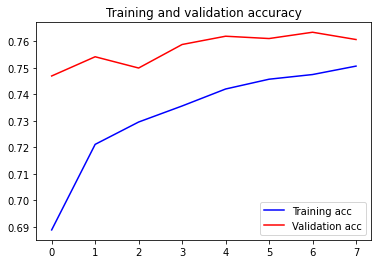

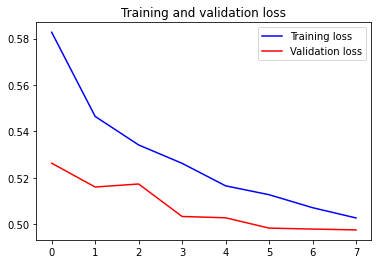

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show() # Seems like the model may be overfitting. training loss << validation loss

In [39]:
def decode_sentiment(score):
    return 'NEGATIVE' if score < 0.5 else 'POSITIVE'
    
def predict(text, include_neutral=True):
    start_at = time.time()
    # Tokenize text
    x_test = pad_sequences(tokenizer.texts_to_sequences([text]), maxlen=300)
    # Predict
    score = model.predict([x_test])[0]
#     print(score)
    # Decode sentiment
    label = decode_sentiment(score[0])

    return {"label": label, "score": float(score),
       "elapsed_time": time.time()-start_at}  

In [40]:
predict("Leave a like on this video, comment, and subscribe for more!")

{'label': 'POSITIVE',
 'score': 0.6529418230056763,
 'elapsed_time': 0.08769869804382324}

In [41]:
predict("I hope you like it!")

{'label': 'POSITIVE',
 'score': 0.6415274143218994,
 'elapsed_time': 0.08696579933166504}

In [43]:
predict("I love you")

{'label': 'POSITIVE',
 'score': 0.9130052328109741,
 'elapsed_time': 0.08437418937683105}